In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("Delhi Cant.xlsx")
df.head()

,Name,Guardian,Gender,G_Relation,H. No.,Age,File Name,Ward Number,Page Number,Image Number
0,Pooja,Lalit Ram,F,F,NaN,20,380001-03.jpg1,380001,3,1
1,Rupesh Sharma,Kanbaiya Lal Shamma,M,F,71/1,38,380001-03.jpg2,380001,3,2
2,Radha,Sanfay,F,H,736,29,380001-03.jpg3,380001,3,3
3,Sugam Yadav,Roop Singh,M,F,72/6,27,380001-03.jpg4,380001,3,4
4,Prithvi Raj,Jathu Ram,M,F,72(10,33,380001-03.jpg5,380001,3,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111660 entries, 0 to 111659
Data columns (total 10 columns):
Name            109202 non-null object
Guardian        111527 non-null object
Gender          111660 non-null object
G_Relation      111031 non-null object
H. No.          110524 non-null object
Age             111660 non-null int64
File Name       111660 non-null object
Ward Number     111660 non-null int64
Page Number     111660 non-null int64
Image Number    111660 non-null int64
dtypes: int64(4), object(6)
memory usage: 8.5+ MB


In [4]:
df.describe()

,Age,Ward Number,Page Number,Image Number
count,111660.000000,111660.000000,111660.000000,111660.000000
mean,40.143418,380056.415010,21.658741,14.998289
std,12.522231,33.206274,12.014283,8.648932
min,5.000000,380001.000000,3.000000,1.000000
25%,30.000000,380027.000000,12.000000,7.000000
50%,39.000000,380056.000000,21.000000,15.000000
75%,49.000000,380085.000000,31.000000,22.000000
max,100.000000,380114.000000,62.000000,30.000000


In [13]:
df=df.drop(1265)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111659 entries, 0 to 111659
Data columns (total 10 columns):
Name            109201 non-null object
Guardian        111526 non-null object
Gender          111659 non-null object
G_Relation      111030 non-null object
H. No.          110523 non-null object
Age             111659 non-null int64
File Name       111659 non-null object
Ward Number     111659 non-null int64
Page Number     111659 non-null int64
Image Number    111659 non-null int64
dtypes: int64(4), object(6)
memory usage: 9.4+ MB


In [15]:
df.isnull().sum()

Name            2458
Guardian         133
Gender             0
G_Relation       629
H. No.          1136
Age                0
File Name          0
Ward Number        0
Page Number        0
Image Number       0
dtype: int64

In [16]:
df=df.fillna(0)

In [18]:
df.isnull().sum()

Name            0
Guardian        0
Gender          0
G_Relation      0
H. No.          0
Age             0
File Name       0
Ward Number     0
Page Number     0
Image Number    0
dtype: int64

In [19]:
df.groupby([df["Age"]<=30,df["Gender"]]).count()

Name  Guardian  G_Relation  H. No.    Age  File Name  \
Age   Gender                                                          
False F       38987     38987       38987   38987  38987      38987   
      M       44331     44331       44331   44331  44331      44331   
True  F       13031     13031       13031   13031  13031      13031   
      M       15310     15310       15310   15310  15310      15310   

              Ward Number  Page Number  Image Number  
Age   Gender                                          
False F             38987        38987         38987  
      M             44331        44331         44331  
True  F             13031        13031         13031  
      M             15310        15310         15310

In [21]:
def age(age): ##Function to convert age data type as int
    if age <= 30:
        return "young"
    elif age > 30:
        return "aged"

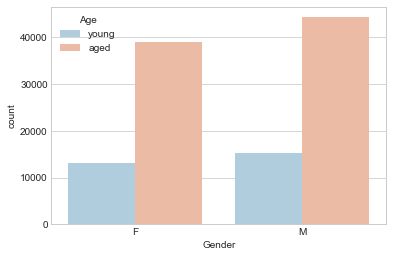

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue=df['Age'].apply(age),data=df,palette='RdBu_r')

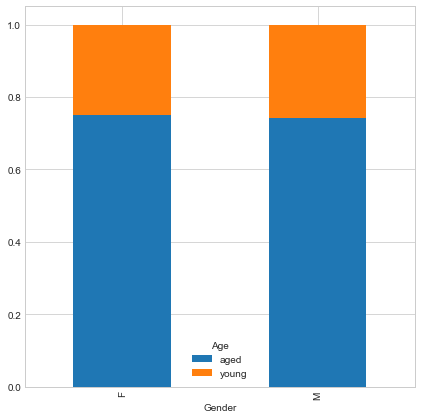

In [33]:
value=pd.crosstab(df['Gender'],df['Age'].apply(age))
value.div(value.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(7,7))